In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

from brain_observatory_nwb2_data_set import BrainObservatoryNwb2DataSet

## Load the session nwb

_BrainObservatoryNwb2DataSet_ was designed to be as compatable with _allensdk.core.brain_observatory_nwb_data_set.BrainObservatoryNwbDataSet_ as possible. The only novel feature at the moment is the methods for getting L0 events (see below)

In [2]:
# I've uploaded the some example NWB 2 files to /allen/aibs/mat/Kael/vc_targeted_contrast 
# nwb_session_path = 'output/682746585.nwb'  # No eye-tracking
# nwb_session_path = 'output/694856258.nwb'
nwb_session_path = 'output/695462675.nwb'


# sessions with eye-tracking
# nwb_session_path = 'output/695462675.nwb'

data_set = BrainObservatoryNwb2DataSet(nwb_session_path)

## Session Metadata


Note: experiment_container_id value taken from lims is None form most (perhaps all?) of these session. 

In [3]:
print('Metadata:')
pprint(data_set.get_metadata())
print()

Metadata:
{'age_days': 134,
 'cre_line': 'Sst-IRES-Cre/wt',
 'device': None,
 'device_name': 'CAM2P.1',
 'excitation_lambda': 910.0,
 'fov': None,
 'genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'imaging_depth_um': '275',
 'indicator': 'GCaMP6f',
 'ophys_experiment_id': '695547291',
 'session_start_time': datetime.datetime(2018, 5, 9, 0, 4, 34, 881000, tzinfo=tzoffset(None, -25200)),
 'session_type': None,
 'sex': 'male',
 'specimen_name': None,
 'targeted_structure': 'VISl'}



## Stimulus Table

In [4]:
data_set.get_stimulus_table()

,start,end,temporal_frequency,spatial_frequency,direction,contrast
0,195,255,1.0,0.04,225.0,0.40
1,286,346,1.0,0.04,270.0,0.80
2,376,436,1.0,0.04,90.0,0.05
3,467,527,1.0,0.04,225.0,0.20
4,558,617,1.0,0.04,90.0,0.05
...,...,...,...,...,...,...
715,64924,64984,1.0,0.04,135.0,0.20
716,65015,65075,1.0,0.04,180.0,0.80
717,65105,65165,1.0,0.04,0.0,0.80
718,65196,65256,1.0,0.04,225.0,0.80


## Cell/ROI data

#### To-do:

* Need to figure out how to find __roi_ids__?

In [5]:
print('number of cells: {}\n'.format(data_set.number_of_cells))

print('specimen_ids: {}\n'.format(data_set.get_cell_specimen_ids()))

print('specimen indices: {}'.format(data_set.get_cell_specimen_indices(data_set.get_cell_specimen_ids())))

number of cells: 9

specimen_ids: [696020063, 696020061, 696020071, 696020069, 696020067, 696020065, 696020073, 696020085, 696020083]

specimen indices: [0, 1, 2, 3, 4, 5, 6, 7, 8]


### Fluorescence Traces


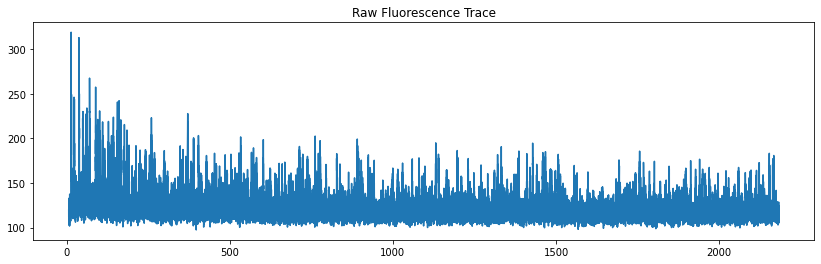

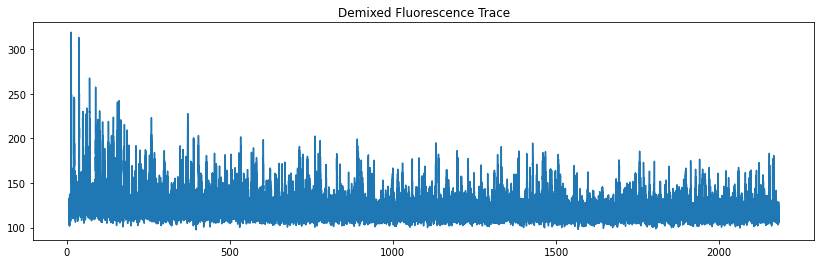

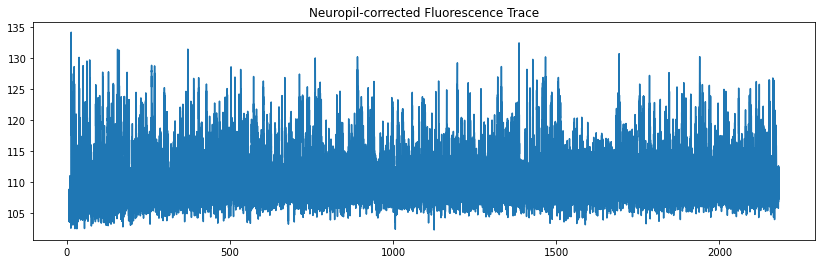

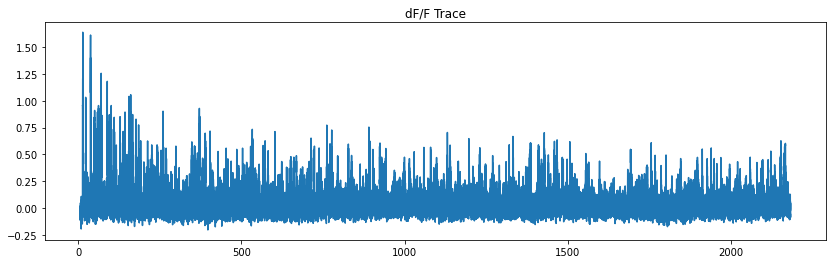

In [6]:
selected_cell_id = np.random.choice(data_set.get_cell_specimen_ids(), size=1)[0]

time, raw_traces = data_set.get_fluorescence_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Raw Fluorescence Trace")
plt.plot(time, raw_traces[0])

_, demixed_traces = data_set.get_demixed_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Demixed Fluorescence Trace")
plt.plot(time, demixed_traces[0])

_, neuropil_traces = data_set.get_neuropil_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("Neuropil-corrected Fluorescence Trace")
plt.plot(time, neuropil_traces[0])

_, dff_traces = data_set.get_dff_traces(cell_specimen_ids=[selected_cell_id])
plt.figure(figsize=(14,4))
plt.title("dF/F Trace")
plt.plot(time, dff_traces[0])

### Neuropil r

In [7]:
print(data_set.get_neuropil_r(cell_specimen_ids=[selected_cell_id]))

[0.062]


### ROI Masks

Text(0.5, 1.0, 'max projection')

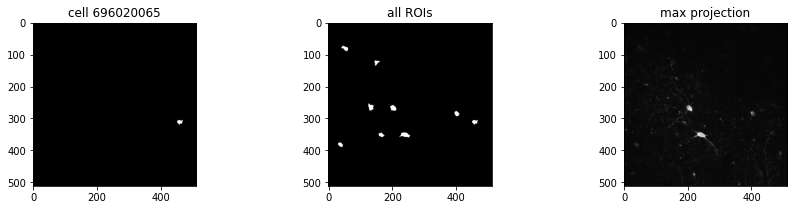

In [8]:
cell_ids = data_set.get_cell_specimen_ids()
rand_cell_ids = np.random.choice(cell_ids, size=1)

# Individual ROIs
f, axes = plt.subplots(1, len(rand_cell_ids) + 2, figsize=(15, 3))
for i, cell_id in enumerate(rand_cell_ids):
    roi_mask = data_set.get_roi_mask(cell_specimen_ids=[cell_id])[0]
    axes[i].imshow(roi_mask.get_mask_plane(), cmap='gray')
    axes[i].set_title('cell %d' % cell_id)

# All ROI masks
all_roi_masks = data_set.get_roi_mask_array()
combined_mask = all_roi_masks.max(axis=0)
axes[-2].imshow(combined_mask, cmap='gray')
axes[-2].set_title('all ROIs')

# Max projection
max_projection = data_set.get_max_projection()
axes[-1].imshow(max_projection, cmap='gray')
axes[-1].set_title('max projection')

## Running Speed

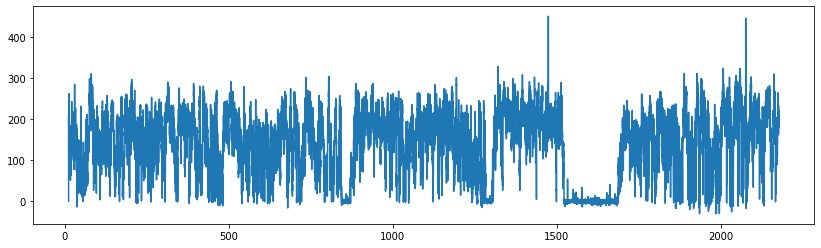

In [9]:
dxcm, dxtime = data_set.get_running_speed()
plt.figure(figsize=(14,4))
plt.plot(dxtime, dxcm)
plt.show()

## Motion Correction

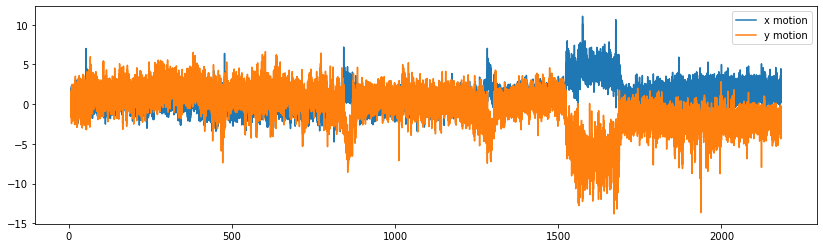

In [10]:
mc = data_set.get_motion_correction()

plt.figure(figsize=(14,4))
plt.plot(mc.timestamp, mc.x_motion)
plt.plot(mc.timestamp, mc.y_motion)
plt.legend(['x motion','y motion'])
plt.show()

## Eye Tracking

Not all session will contain eye-tracking data.

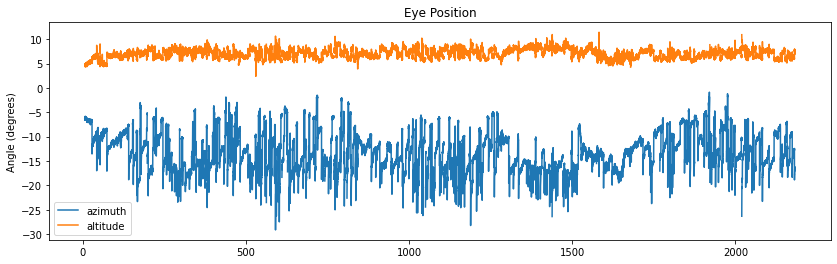

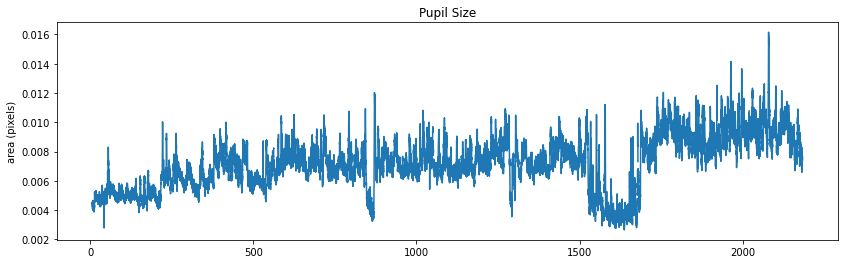

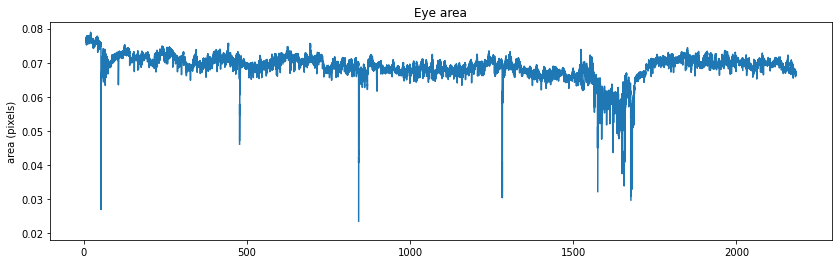

In [11]:
if data_set.has_eye_tracking:
    # Get pupil location (azimuth + altitude)
    timestamps, coords = data_set.get_pupil_location()
    plt.figure(figsize=(14,4))
    plt.plot(timestamps, coords[0], label='azimuth')
    plt.plot(timestamps, coords[1], label='altitude')
    plt.legend()
    plt.title('Eye Position')
    plt.ylabel('Angle (degrees)')
    
    timestamps, pupil_area = data_set.get_pupil_size()
    plt.figure(figsize=(14,4))
    plt.plot(timestamps, pupil_area)
    plt.ylabel('area (pixels)')
    plt.title('Pupil Size')

    timestamps, eye_area = data_set.get_eye_area()
    plt.figure(figsize=(14,4))
    plt.plot(timestamps, eye_area)
    plt.ylabel('area (pixels)')
    plt.title('Eye area')
else:
    print('No Eye Tracking Data')

## L0 Events

In [12]:
data_set.get_units_table()

,pos_x,pos_y
cell_specimen_id,,
696020063,53,82
696020061,151,126
696020071,133,265
696020069,203,268
696020067,402,286
696020065,458,312
696020073,166,352
696020085,240,352
696020083,39,382


Text(0.5, 1.0, 'Cell 696020061 DF/F events')

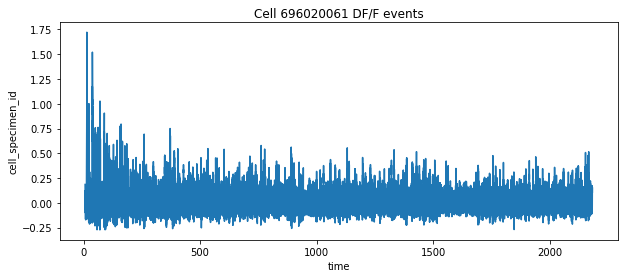

In [13]:
plt.figure(figsize=(10, 4))
times, dff_events = data_set.get_l0_dff_events(cell_specimen_ids=[selected_cell_id])

plt.plot(times, dff_events[0])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('time')
plt.ylabel('cell_specimen_id')
plt.title('Cell {} DF/F events'.format(selected_cell_id))

Text(0.5, 1.0, 'Cell 696020061 True/False events')

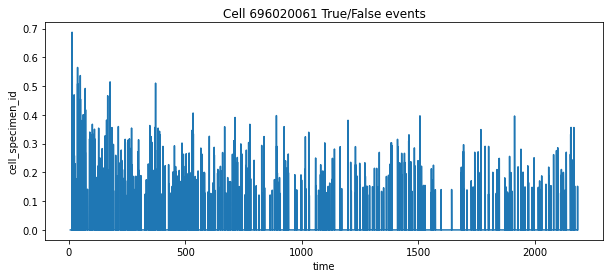

In [14]:
plt.figure(figsize=(10, 4))
times, tf_events = data_set.get_l0_true_false_events(cell_specimen_ids=[selected_cell_id])

plt.plot(times, tf_events[0])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('time')
plt.ylabel('cell_specimen_id')
plt.title('Cell {} True/False events'.format(selected_cell_id))